# Linear Regression using Gradient Descent

[Author: Adarsh Menon](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

In this tutorial you can learn how the gradient descent algorithm works and implement it from scratch in python. First we look at what linear regression is, then we define the loss function. We learn how the gradient descent algorithm works and finally we will implement it on a given data set and make predictions.

## Linear Regression
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$$Y = mX+c$$

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

## Loss Function
The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c.<br>
We will use the **Mean Squared Error** function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.<br>
- Square this difference.
- Find the mean of the squares for every value in X.


$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i-(mx_1 + c))^2$$

So we square the error and find the mean. hence the name Mean Squared Error. Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding **m** and **c**.

## The Gradient Descent Algorithm
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.
### Understanding Gradient Descent
<img src="gradient_descent.jpeg" alt = 'Illustration of how the gradient descent algorithm works' style ='width: 600px'>

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and **takes large steps when the slope is steep and small steps when the slope is less steep**. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.

>So one of the best ways for him to get to the botton is to always choose the steepest route at his start/stop points. In math, it's the negative gradient of the point that the person stands. 

Let’s try applying gradient descent to m and c and approach it step by step:
1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
- Calculate the **partial derivative** of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.

>In mathematics, a partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant 

$$D_m = \frac{1}{n} \sum_{i=0}^{n}2(y_i-(mx_1+c))(-x_i) $$

$$D_m = \frac{-2}{n} \sum_{i=0}^{n}x_i(y_i-\hat{y_i}) $$

<h18><center><font color='grey'>Derivative with respect to **m**</font></center></h18>

Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :

$$D_c = \frac{-2}{n} \sum_{i=0}^{n}(y_i-\hat{y_i}) $$

<h18><center><font color='grey'>Derivative with respect to **c**</font></center></h18>

3. Now we update the current value of m and c using the following equation:

$$ m := m - L \times D_m$$
$$ c := c - L \times D_c$$

4. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

>The whole function can also be generalised in this way:
$$\theta_j:= \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$$ <br>
where j = 0, 1 represent the feature index number and should be updated simultaneously
In this case, $\alpha$ is the learning rate, $\frac{\partial}{\partial\theta_j}$ is the patial derivative and $J(\theta_0, \theta_1)$ is the cost function

Now going back to our analogy, m can be considered the current position of the person. **D is equivalent to the steepness of the slope** and **L can be the speed with which he moves**. Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take. When the slope is more steep (D is more) he takes longer steps and when it is less steep (D is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.
Now with the optimum value of m and c our model is ready to make predictions!

# Implementing the Model
Now let’s convert everything above into code and see our model in action !

In [12]:
# !curl -O https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3778  100  3778    0     0   9214      0 --:--:-- --:--:-- --:--:--  9237


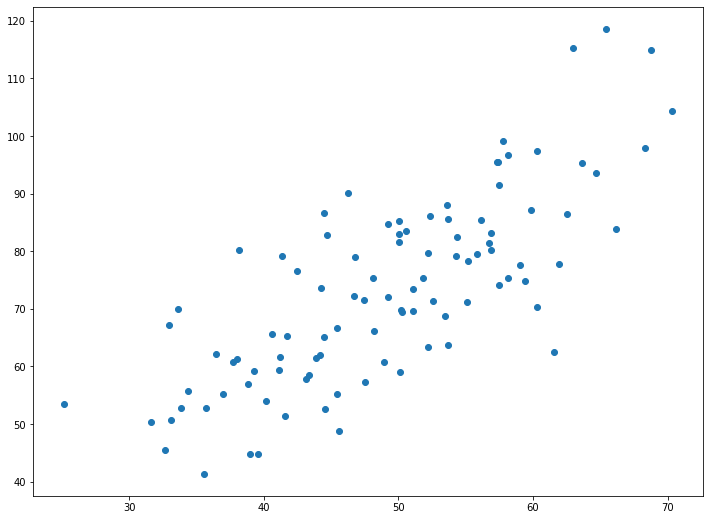

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [45]:
# Building the model 
m = 0
c = 0
# Starting point

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753726


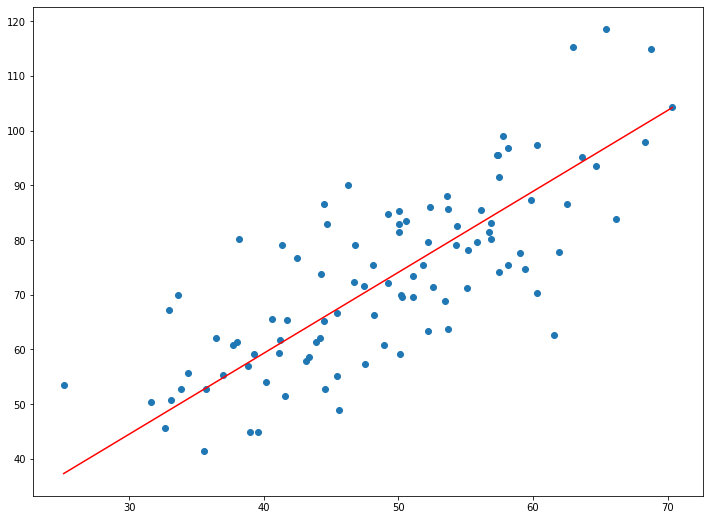

In [46]:
# Making predictions
Y_pred = m*X + c
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

## Run the Model with default LR

In [4]:
X_d = data.iloc[:, :1]
# X_d needs to be 2D arrary in sklearn to be handled in the fitting function, thus this slicing method is used
# data.iloc[:, :1] meaning that it's taking the 0 to 1-1 column of the dataframe (slicing)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_d, Y)
m_d = regressor.coef_[0]
c_d = regressor.intercept_
print (m_d, c_d)

1.2873573700109313 9.908606190326537


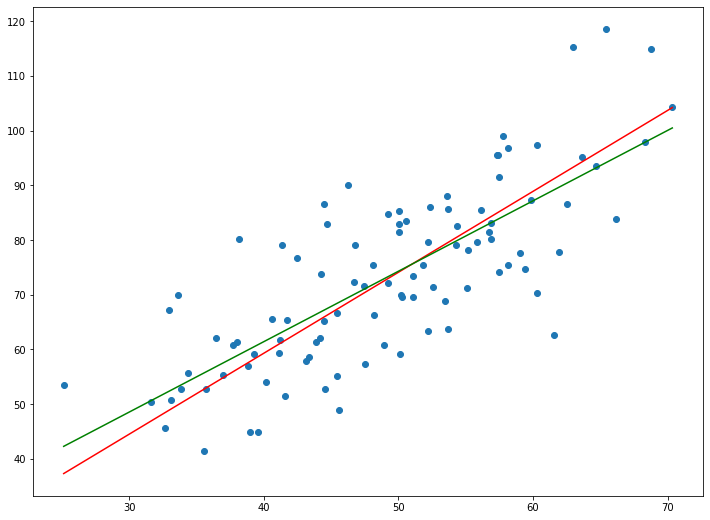

In [12]:
# Making predictions
Y_pred_d = m_d*X + c_d
Y_pred = m*X + c
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label = 'Gradient Descent')  # regression line
plt.plot([min(X), max(X)], [min(Y_pred_d), max(Y_pred_d)], color='green', label = 'Default')  # regression line default
plt.show()

## Model Evaluation

We use r-squared to compare the two models. For gradient descent, we can only do the manual calculation:

### Compare r-squared of the model vs. sklearn default model

In [26]:
# compute with formulas from the theory for gradient descent
yhat = Y_pred
SS_Residual = sum((Y-yhat)**2)       
SS_Total = sum((Y-np.mean(Y))**2) 
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-1-1)
# the (len(Y)-0-1) is correspond to n-k-1. the k is the number of independent variables: 1
print(r_squared, adjusted_r_squared)

0.5865710901999908 0.5823089364907124


> formula of r-squared
$$R^2 = 1 - \frac{SS_{Residual}}{SS_{Total}}$$ <br>
<h18><font color='grey'>$SS_{Residual}$ is Sum Sqaured Residual Error and $SS_{Total}$ is Sum Sqaured Total Error</font></h18> <br><br>
This is the same as:
$$R^2 = 1 - \frac{\sum(y_i-\hat{y_i})}{\sum(y_i-\bar{y_i})} $$ <br> <br>
<h18><font color='grey'> $\sum(y_i-\hat{y_i})$ is sum of squares of residuals from the regression model and $\sum(y_i-\bar{y_i})$ is sum of squares of errors from the average model</font></h18>

> formula of adjusted r-squared
$$R^2_{adj} = 1-[\frac{(1-R^2)(n-1)}{n-k-1}]$$<br>
<h18><font color='grey'>**n** is the number of points in your data sample.<br>
**k** s the number of independent regressors, i.e. the number of variables in your model, excluding the constant.</font></h18>

In [21]:
regressor.score(X_d, Y)

0.5871609494806326

Looks like in this case, the sklearn default LR outperforms the basic gradident descent method we tried out. We can try adjust learning rate and starting point for a change

In [48]:
# Building the model 
m = 1
c = 1
# Starting point

L = 0.0002  # The learning Rate
epochs = 100000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)
# Making predictions
Y_pred = m*X + c

1.3274025661186528 7.8662505351010275


In [43]:
# compute with formulas from the theory for gradient descent
yhat = Y_pred
SS_Residual = sum((Y-yhat)**2)       
SS_Total = sum((Y-np.mean(Y))**2) 
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-1-1)
# the (len(Y)-0-1) is correspond to n-k-1. the k is the number of independent variables: 1
print(r_squared, adjusted_r_squared)
# 0.5864340484980364 0.5821704819877068 (for starting point (0, 0) and the others remaining the same)

0.5865711075639763 0.5823089540337081


From the tuning experience just now, I can see that the r-squares do change and can be gradually improved. Increasing the learning rate to 0.002 slightly increased the r-squared. However, when the learning rate was increased to 0.01, the gradient descent failed to converge. Increasing the number of rounds to 10,000 also improved the r-squared slightly. When I increased the number of rounds to 100,000, the r-square improved quite a bit and the running time also became longer. The last attempt was to move the starting point to (1,1) and the r-squared again slightly improved.

### Compare mean squared error of the model vs. sklearn default model

As mentioned previously, the eqation for mean squared error is as below:

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_1-\hat{y_1})$$

In [49]:
# MSE for gradient descent
mse_gd = 1/n*sum((Y - Y_pred)**2)
# MSE for default
mse_df = 1/n*sum((Y - Y_pred_d)**2)
print(mse_gd, mse_df)
# 107.62398490782397 107.47043700950915

107.62398490782397 107.47043700950915


In [39]:
Y - Y_pred

0    -10.007533
1    -26.979430
2      0.661098
3     -0.031536
4     -2.850617
        ...    
94     7.260559
95    -1.115408
96    10.943096
97    -5.555537
98    12.232544
Length: 99, dtype: float64

The default sklearn LR algorithm still outperforms the tunned gradient descent algorithm by a little bit.